# Project Description

## Project Context and Objective

The digital world, particularly the app ecosystem, is currently experiencing a golden age. The smartphone, now widespread across all age groups, has become an integral and inseparable part of the lives of millions of people. **This pervasiveness has revolutionized the way we interact with the world**, enabling access to services, information, and entertainment with a simple click. As a result, apps have an extraordinary potential to positively impact people's daily lives.

However, **prolonged and compulsive smartphone use can also have negative consequences**, such as phone addiction, affecting well-being and social relationships.

**The goal of this project is to develop an app that becomes an integral part of people's daily lives, having a positive impact**. To achieve this, analyzing the data of apps available on the Google Play Store will be fundamental: not to decide what type of app to create, but to identify the most promising category in which to develop it.

The **data-driven approach** will help identify trends, correlations, and opportunities within the app market, ensuring an informed choice about the category in which to launch our project and maximize its positive impact on users.

## Project Strategy and Focus

This project focuses on analyzing the dataset of apps available in the Google Play Store and includes the following steps:

1. **Data Selection**:
   - Select the dataset of available apps from the Google Play Store to be used for analysis, including key information such as categories, ratings, reviews, number of installations, price, and more.

2. **Data Cleaning and Transformation**:
   - Clean and transform the data to remove errors, missing values, or anomalies and prepare the dataset for in-depth analysis.

3. **Data Exploration & Data Visualization**:
   - The most extensive phase of the project, which involves exploring key variables:
     - **Category Analysis**: Identify the most relevant and significant app categories based on metrics such as number of apps, popularity, and emerging trends.
     - **Correlation Between Variables**: Explore correlations between variables like **rating**, **reviews**, **number of installations**, **price**, etc., to understand the factors influencing an app's success.
     - **Identification of Outliers**: Identify apps that stand out for unusual performance to analyze the key factors that contributed to their success or failure.
     - **Visualization of Results**: Create graphs and tables that showcase the main insights derived from the analysis.

4. **Conclusions**:
   - A summary of the main findings from the data analysis, with a clear identification of the most promising category for the development of our app. This phase will include strategic recommendations based on the insights gathered.


# 1. Data selection

### Introduction to the Datasets Used

The project is developed using two main datasets, downloaded from **Kaggle**, for analyzing the Android app market available on the Google Play Store. These datasets provide a comprehensive overview of the features and reviews of apps on this platform, with the aim of deriving useful insights for the development and success of new applications.

#### Dataset 1: Google Play Store Apps

- **File Name**: `googleplaystore.csv`
- This dataset contains information related to approximately 10,000 apps available on the Google Play Store. It includes data such as the app name, category, number of reviews, rating, app size, and more.
- The dataset was collected through web scraping and provides a solid foundation for analyzing trends and dynamics in the Android market.

#### Dataset 2: Google Play Store User Reviews

- **File Name**: `googleplaystore_user_reviews.csv`
- This dataset collects user reviews for apps available on the Play Store. It includes information such as the review text, the sentiment expressed (positive, negative, neutral), polarity, and subjectivity of the comment.
- Reviews represent a valuable resource for understanding user feedback, preferences, and areas where developers can improve their products.

#### Analysis Objective

Through the combined analysis of these two datasets, the project's goal is to derive **insights** for the Android app market, providing guidance on how to improve app quality, increase the number of downloads, and enhance overall ratings. The information extracted can help developers and companies make strategic decisions to succeed in the competitive app market.


In [8]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as ticker
import seaborn as sns
from IPython.display import display


# Increase the number of rows that can be displayed
import json
pd.set_option('display.max_rows', 1000)


In [9]:
# Import datasets from the specified path
df1 = pd.read_csv(r"C:\Users\simon\Desktop\S2i\Python\Progetto Pandas\googleplaystore.csv")
df2 = pd.read_csv(r"C:\Users\simon\Desktop\S2i\Python\Progetto Pandas\googleplaystore_user_reviews.csv")


In [10]:
# Merge datasets
df_null = pd.merge(df1, df2, on="App")


In [11]:
# Create a copy of the merged DataFrame and remove null values
df_original = df_null.copy()  
df = df_original.dropna()


In [12]:
# Create a copy of the DataFrame to simulate the removal of rows with missing values
test_drop = df_original.dropna()

# Evaluate the impact by calculating the percentage of rows removed
rows_removal_perc = round((1 - test_drop.shape[0] / df_original.shape[0]) * 100, 2)

print(f"\nRows in the original DataFrame: {df_original.shape[0]}.")

print(f"\nRemaining rows after removing those with missing values: {test_drop.shape[0]}")

print(f'\nBy removing rows with missing values, {rows_removal_perc}% of the data was eliminated!')



Rows in the original DataFrame: 122662.

Remaining rows after removing those with missing values: 72566

By removing rows with missing values, 40.84% of the data was eliminated!


---
---
# 2. Data Cleaning and Transformation

This section contains the steps for cleaning and preparing the data for subsequent analysis and visualization.


In [153]:
# Check the size of the dataset and read what the columns contain, providing a preview with head
print(f"Dimensions of the dataframe: {df.shape[0]} rows and {df.shape[1]} columns.")
print("\nColumns of the dataframe:\n", df.columns)
df_original.head()


Dimensions of the dataframe: 72566 rows and 11 columns.

Columns of the dataframe:
 Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity'],
      dtype='object')


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


In [15]:
# Remove the "+" sign and spaces, then convert to integer type
df.loc[:, "Installs"] = df["Installs"].str.replace(r"\+", '', regex=True)
df.loc[:, "Installs"] = df["Installs"].str.replace(r",", '', regex=True)
df.loc[:, "Installs"] = df["Installs"].str.replace(r" ", '', regex=True)
df.loc[:, "Installs"] = df["Installs"].astype(int)


In [16]:
# Convert the Rating column to float type
df.loc[:, "Rating"] = df["Rating"].astype(float)


In [17]:
# Remove the "$" sign and convert the "Price" column to float type
df.loc[:, "Price"] = df["Price"].str.replace(r"\$", '', regex=True)
df.loc[:, "Price"] = df["Price"].astype(float)



In [18]:
# Convert the "Reviews" column to integer type
df.loc[:, "Reviews"] = df["Reviews"].astype(int)


In [19]:
# Drop the specified columns from the original DataFrame
df.drop(columns=["Content Rating", "Translated_Review", "Android Ver", "Genres", "Last Updated", "Current Ver"], inplace=True)

C:\Users\simon\AppData\Local\Temp\ipykernel_23532\543003833.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["Content Rating", "Translated_Review", "Android Ver", "Genres", "Last Updated", "Current Ver"], inplace=True)


I decided to remove the following columns from the DataFrame:

- **Content Rating**
- **Translated_Review**
- **Android Ver**
- **Genres**
- **Last Updated**
- **Current Ver**

These columns were removed because they contained qualitative or irrelevant information for my analysis. Elements such as the Android version, app genre, or translated reviews are not crucial for the purpose of my research, which focuses more on quantitative data such as reviews, ratings, and app size.

Specifically, the **Genres** column was removed because it was very similar to the **Category** column, making it redundant.


In [21]:
# Convert the "Size" column to string type
df.loc[:, "Size"] = df["Size"].astype(str)

# Remove "M" from the "Size" column
df.loc[:, "Size"] = df["Size"].str.replace(r"M", '', regex=True)

# Convert the "Size" column to numeric, coercing errors
df.loc[:, "Size"] = pd.to_numeric(df["Size"], errors='coerce')


In [22]:
# Preview the first 10 rows of the DataFrame
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Negative,-0.250000,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Negative,-0.725000,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Neutral,0.000000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Positive,0.500000,0.600000
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Negative,-0.800000,0.900000
7,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Neutral,0.000000,0.000000
8,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Positive,0.500000,1.000000
9,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Positive,0.500000,0.600000
10,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Positive,0.500000,0.600000
11,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Positive,0.433333,0.466667


# 3. Data Exploration & Data Visualization

## Methodological Note

In this notebook, only linear scales will be used for graphical representation of the data. To ensure better readability of large numbers, scientific notation will be employed on the axes. This approach allows for a compact and clear visualization of large values using powers of 10, while still maintaining a linear scale for data interpretation.


## 3.1 Analysis of Categories and the Market


In [26]:
# Total number of Apps
n_app = df["App"].nunique()

In [27]:
# Total number of Categories
n_category = df["Category"].nunique()

In [28]:
# Categories with the highest number of installs
instxcat = df.groupby("Category").Installs.sum()
df_instxcat = instxcat.to_frame()
sorted_instxcat = df_instxcat.sort_values(by="Installs", ascending=False)


In [29]:
# Number of reviews for each app
revxapp = df.groupby("App")["Reviews"].sum().reset_index()
sortedrevxapp = revxapp.sort_values(by="Reviews", ascending=False).drop_duplicates(subset="App")

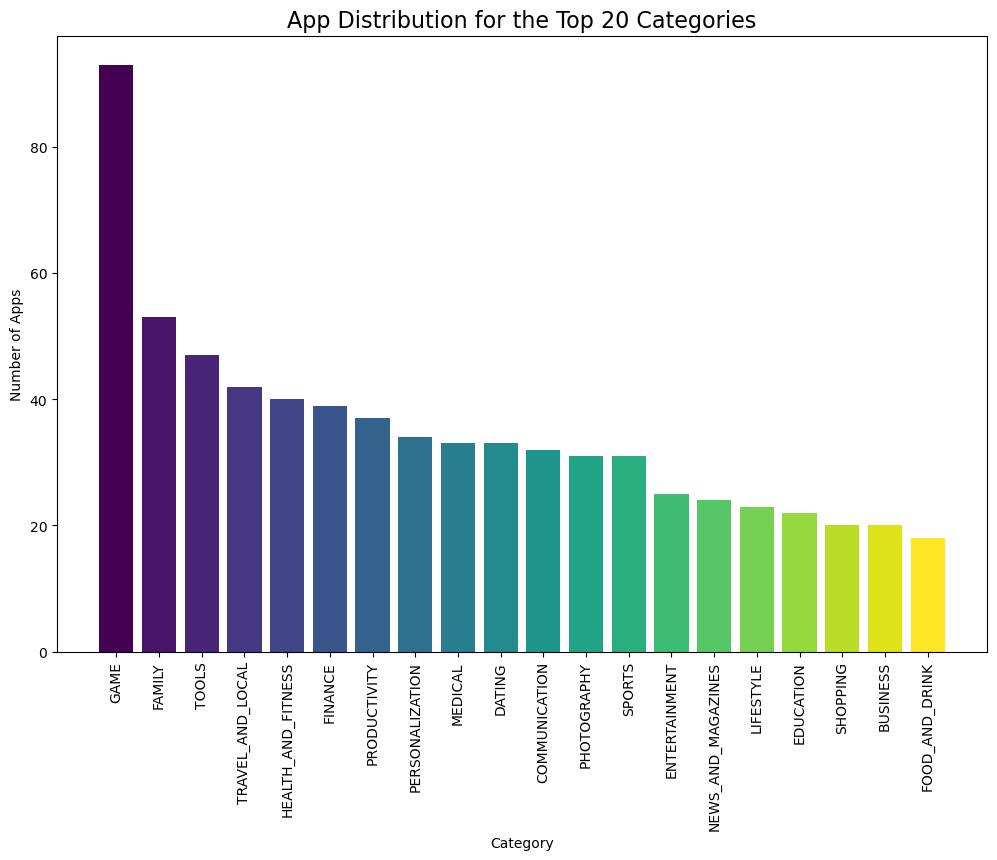

In [30]:
# Remove duplicates for 'App' and count the number of apps per category
df_appxcat = df.drop_duplicates(subset="App").groupby("Category").size().sort_values(ascending=False).to_frame(name="AppCount")

# Select only the top 20 categories
top_20_categories = df_appxcat.head(20)

plt.figure(figsize=(12, 8))

colors = cm.viridis(np.linspace(0, 1, len(top_20_categories)))

plt.bar(top_20_categories.index, top_20_categories["AppCount"], color=colors)
plt.xticks(rotation=90)
plt.title('App Distribution for the Top 20 Categories', fontsize=16)
plt.xlabel('Category')
plt.ylabel('Number of Apps')

plt.show()


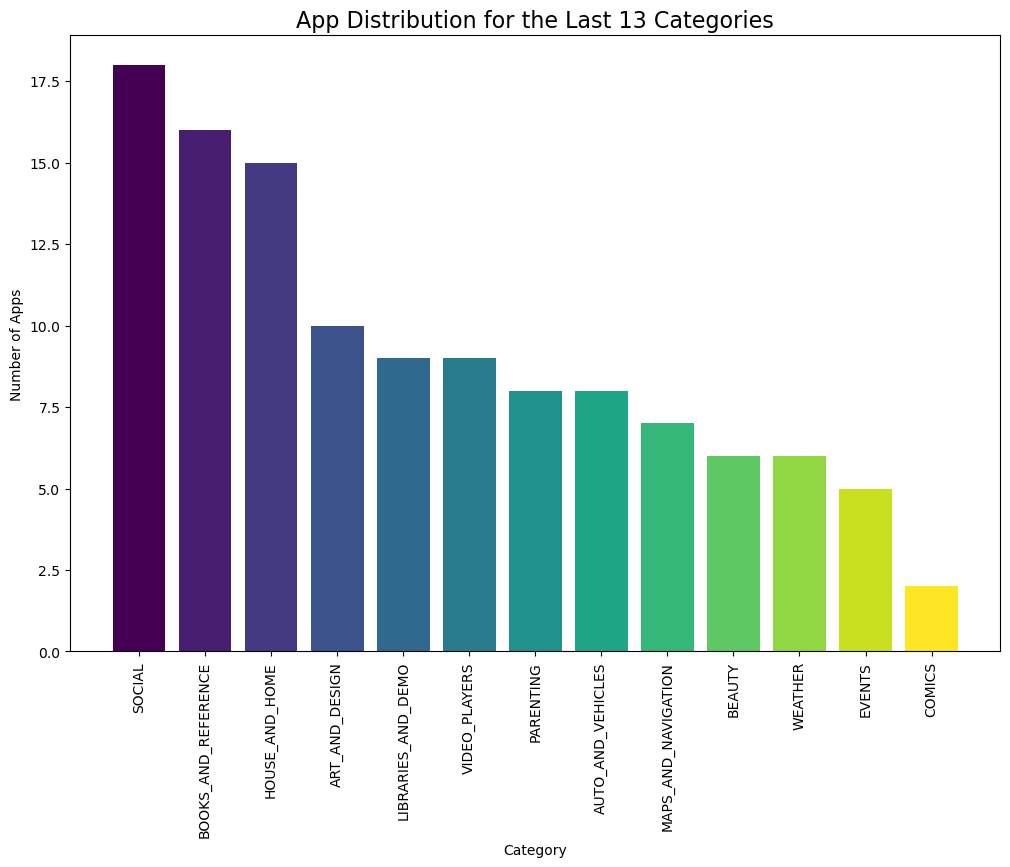

In [31]:
# Select the last 13 categories
last_13_categories = df_appxcat.tail(13)

# Create a bar chart with color gradient for the last 13 categories
plt.figure(figsize=(12, 8))

colors = cm.viridis(np.linspace(0, 1, len(last_13_categories)))

plt.bar(last_13_categories.index, last_13_categories["AppCount"], color=colors)
plt.xticks(rotation=90)
plt.title('App Distribution for the Last 13 Categories', fontsize=16)
plt.xlabel('Category')
plt.ylabel('Number of Apps')

plt.show()


The first chart illustrates the percentage distribution of the top 20 app categories. It is observed that the **Game** category represents the largest share with **29.4%** of the apps, highlighting its dominance in the app market. Other categories such as **Family** and **Tools** follow with lower percentages, **15.8%** and **13.4%**, respectively, while categories like **Social** and **Books and Reference** are below **5%**.

On the other hand, the second pie chart represents the last 13 categories, where the category with the highest number of apps is **Beauty**, with only **4.9%**. Smaller categories like **Comics** represent a minimal fraction of the total, with just **0.2%**.

This distribution suggests that categories with a higher number of apps tend to be the strongest in the market. However, this data alone does not provide a complete picture; categories with fewer apps might represent less saturated market sectors, thus being more open to competition. I will now continue by analyzing the installs per category.


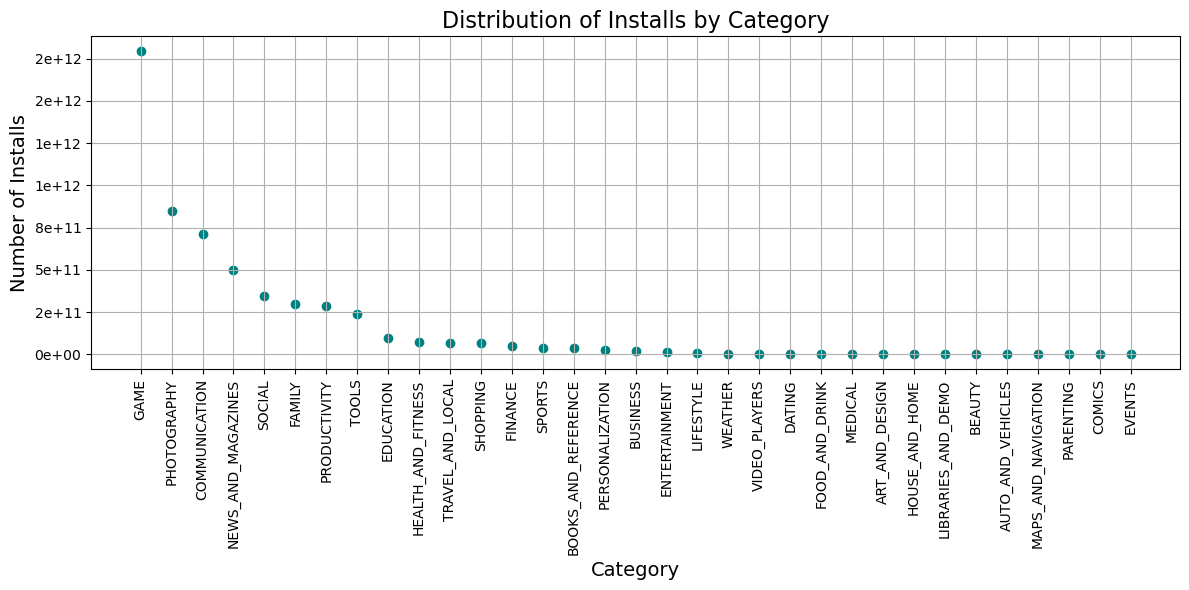

In [33]:
# Create a DataFrame for all categories
df_all_categories = sorted_instxcat.reset_index()
df_all_categories.columns = ['Category', 'Installs']

# Generate the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(x=df_all_categories['Category'], y=df_all_categories['Installs'], color='teal')

plt.title('Distribution of Installs by Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Number of Installs', fontsize=14)

plt.xticks(rotation=90)

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.0e}'))

plt.tight_layout()
plt.grid()
plt.show()


The total number of installs per category offers a dual interpretation: categories with the highest number of installs can represent an opportunity, as they indicate popular apps. However, a high number of installs may also suggest a saturated market, where competition is high and the chances of standing out are limited.

On the other hand, categories with fewer installs could reveal open markets, ready for innovation and the development of new apps. However, a low number of installs might also indicate little user interest.

After examining the charts regarding the distribution of installs by category and the relationship between the number of apps and installs, it is interesting to further explore the analysis by looking at the average rating for each category.


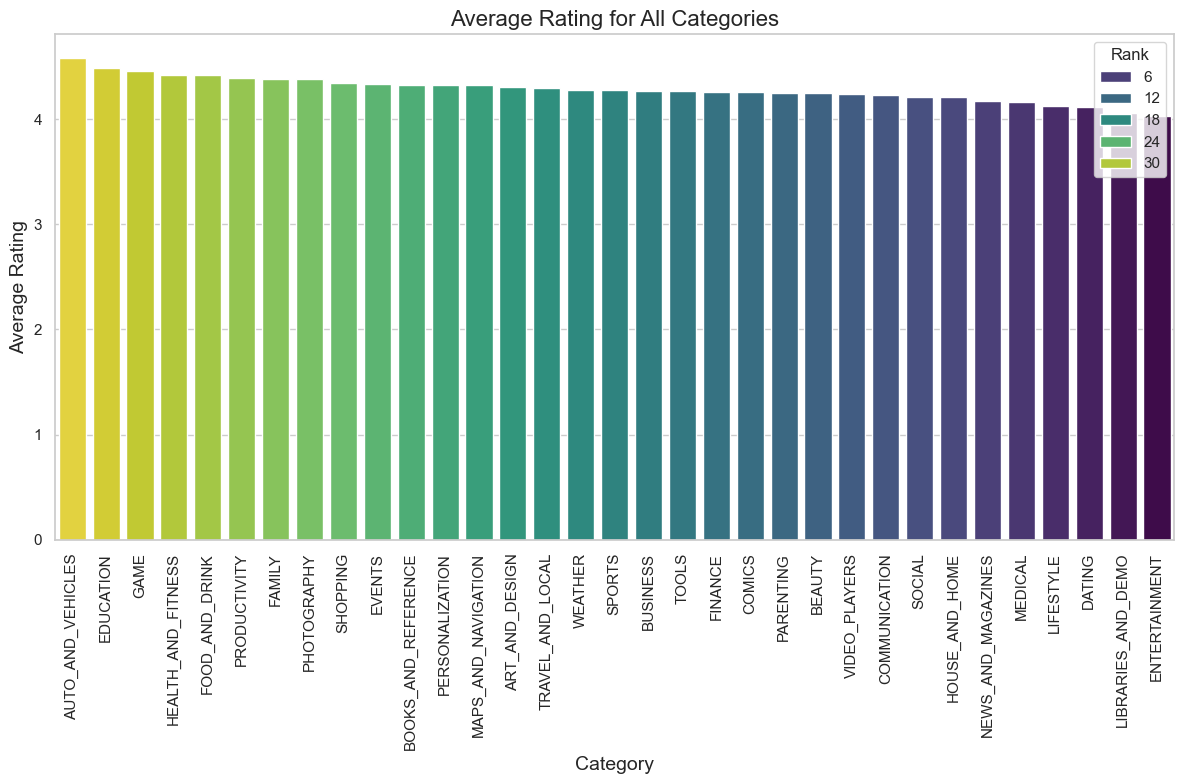

In [35]:
# Identify the average rating for each category
mean = df.groupby("Category")["Rating"].mean()
mean_sorted = mean.sort_values(ascending=False)
df_meansorted = mean_sorted.to_frame()
meanxcat = df_meansorted.rename(columns={"Rating": "AvgRating"}, inplace=True)

# Set the style for the plot
sns.set(style="whitegrid")

# Create a DataFrame for all categories
df_all_categories = mean_sorted.reset_index()
df_all_categories.columns = ['Category', 'AvgRating']

# Add a temporary column for hue
df_all_categories['Hue'] = df_all_categories['AvgRating'].rank(method='first')  

# Create the bar plot for average ratings
plt.figure(figsize=(12, 8))  # Increased size to fit all categories
sns.barplot(x='Category', y='AvgRating', hue='Hue', data=df_all_categories, palette='viridis')

plt.title('Average Rating for All Categories', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=90)  

plt.tight_layout()
plt.legend(title='Rank')  
plt.show()


**Comment on Low Variance in App Ratings**

Low variance observed in average ratings of apps, with scores ranging from **4.06** to **4.58**, indicates that users tend to give similar ratings within the different categories. This phenomenon can be attributed to several user behaviors:

- **Standardized Expectations**: Users have clear and uniform expectations regarding the functionality and quality of apps in each category. When these expectations are met, the rating tends to remain high, reducing variance.

- **Lack of Differentiation**: Low variance suggests that many apps offer similar experiences, leading users to give similar ratings. This may indicate stagnation in innovation, where new apps fail to distinguish themselves from existing ones.

- **Limited Feedback**: Users may also be more inclined to give positive feedback rather than negative, especially if they do not encounter significant issues. This can contribute to maintaining high ratings and limiting dispersion of scores.

In summary, low variance in ratings reflects user behaviors that favor similar evaluations, influenced by uniform expectations and a lack of innovation among apps.


Categories with higher average ratings indicate markets where apps meet user needs and enjoy a good reputation, suggesting a high potential for success. On the other hand, categories with lower ratings may represent opportunities for innovation and improvement, highlighting gaps where apps can address existing shortcomings.

In the case of the identified categories, **Education** stands out with a high average rating, representing a solid market with the second-highest user satisfaction. **News and Magazines** and **Social**, despite having a large number of installs, show a lower average rating, suggesting room for improvement and opportunities for higher-quality apps. **Shopping** and **Books and Reference** have an average rating, offering opportunities for growth and differentiation with innovative apps.


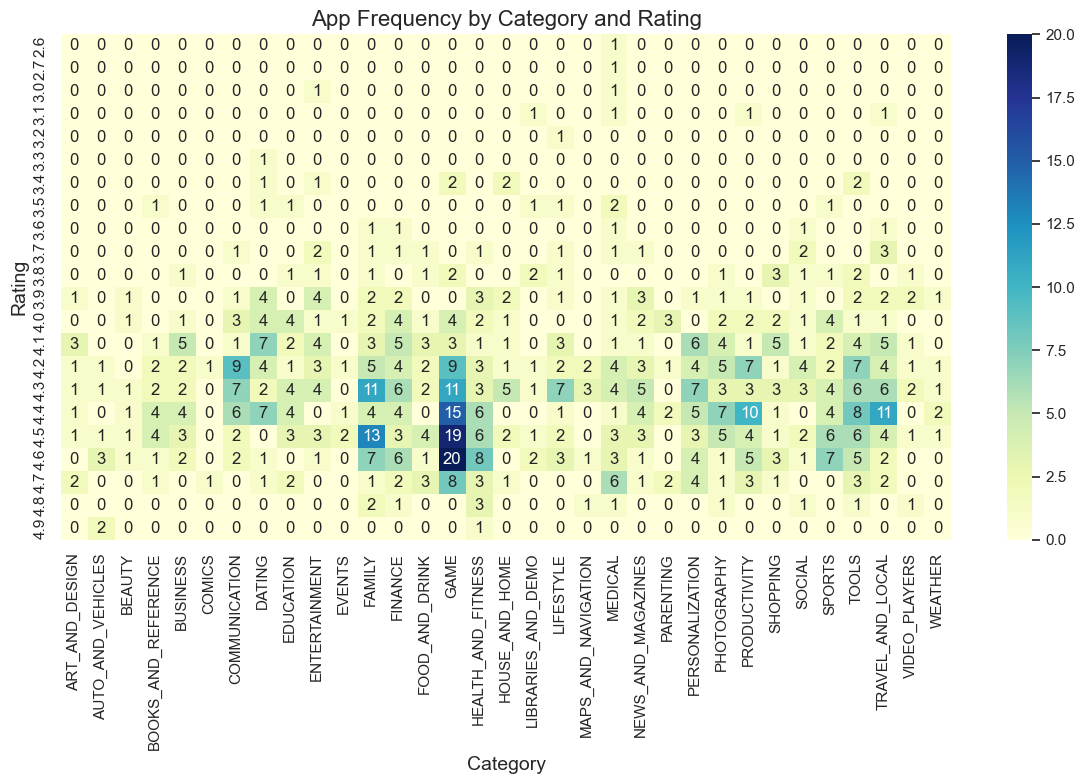

In [38]:
# Remove any duplicate apps
df_unique = df.drop_duplicates(subset='App')

# Create a frequency table using groupby and size
frequency_table = df_unique.groupby(['Rating', 'Category']).size().unstack(fill_value=0)

# Visualize the frequency table with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(frequency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('App Frequency by Category and Rating', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()


The chart represents the frequency of apps broken down by category and rating, displayed through a heatmap.

- **X-axis (Category)**: This axis shows the different app categories, such as games, social media, productivity, etc. Each category is represented as a column in the heatmap.

- **Y-axis (Rating)**: The Y-axis represents the different app rating scores, ranging from lower values (e.g., 1) to higher values (e.g., 5). Each rating is shown as a row in the heatmap.

- **Values in the chart**: Values inside the heatmap indicate the frequency of apps for each category and rating combination. Cells colored in various shades of blue and green represent these frequencies, where darker colors indicate a higher concentration of apps with that particular rating within the corresponding category.

In summary, this visualization helps identify which app categories tend to have higher rating scores and which have less frequency.


From the heatmap, the following observations emerge regarding the categories of interest:

- **News and Magazines**: Apps tend to have average ratings (3.5-4.5), without excelling in higher scores. There is an opportunity to improve the quality of apps in this sector.
- **Social**: Here too, apps are distributed across average ratings, without reaching the highest scores. This indicates room for innovation with higher-quality apps.
- **Education**: This category stands out positively, with several apps achieving high ratings (4.4-4.8), suggesting a solid and mature market for high-quality apps.
- **Shopping**: Most apps have average ratings (3.6-4.3), with few apps excelling. Improving the quality of apps in this sector could represent a competitive advantage.
- **Books and Reference**: Apps are primarily in the average rating range (3.6-4.4). There is also an opportunity to offer higher-quality apps here to achieve higher scores.

In summary, **Education** appears to be a strong category, while the others could benefit from innovative and improved apps to elevate user satisfaction.


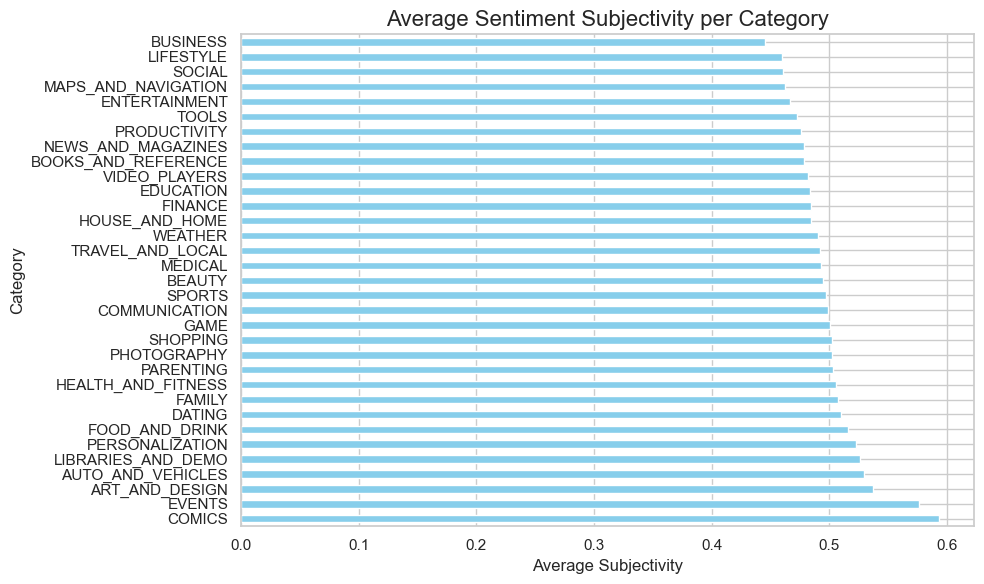

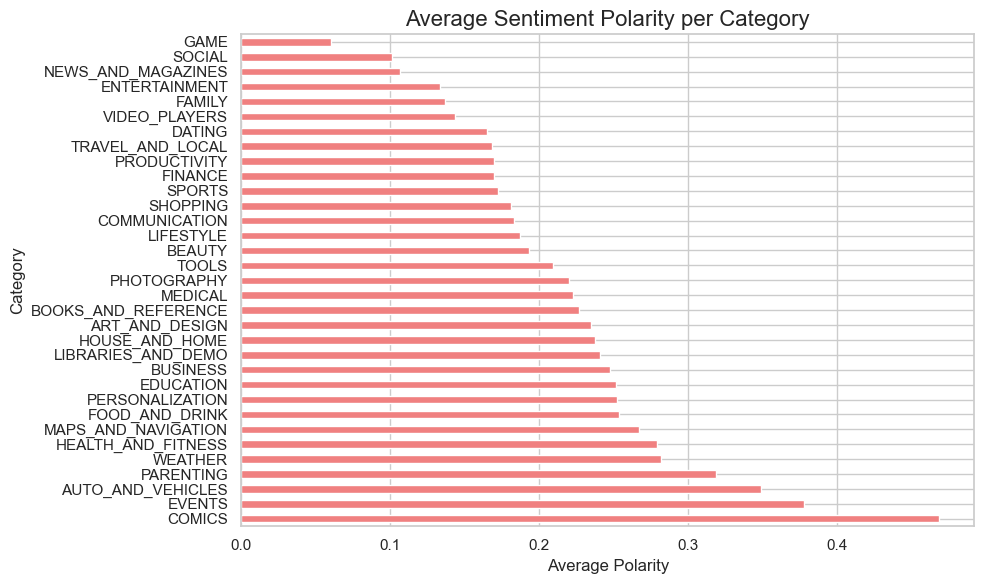

In [41]:
# Average Sentiment Subjectivity per category
ss = df.groupby("Category").Sentiment_Subjectivity.mean()
sorted_ss = ss.sort_values(ascending=False)

# Create a bar chart for Sentiment Subjectivity per category
plt.figure(figsize=(10, 6))
sorted_ss.plot(kind='barh', color='skyblue')

plt.title('Average Sentiment Subjectivity per Category', fontsize=16)
plt.xlabel('Average Subjectivity', fontsize=12)
plt.ylabel('Category', fontsize=12)

plt.tight_layout()
fig1 = plt.gcf()

# Average Sentiment Polarity per category
meansp = df.groupby("Category").Sentiment_Polarity.mean()
sorted_meansp = meansp.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sorted_meansp.plot(kind='barh', color='lightcoral')

plt.title('Average Sentiment Polarity per Category', fontsize=16)
plt.xlabel('Average Polarity', fontsize=12)
plt.ylabel('Category', fontsize=12)

plt.tight_layout()
fig2 = plt.gcf()


**Explanation of Sentiment Subjectivity and Polarity**

- **Subjectivity**: Represents the degree to which an expression reflects personal opinions, feelings, or emotions, rather than objective facts. Texts with high subjectivity express personal feelings and evaluations, while texts with low subjectivity tend to present more objective and factual information.

- **Polarity**: Indicates the direction and intensity of the sentiment expressed. Polarity can range from -1 (strongly negative) to +1 (strongly positive), with values near zero indicating neutrality. This measure helps to understand whether the text conveys a positive, negative, or neutral evaluation.


## Sentiment Analysis of App Categories

The analysis of five categories — **News and Magazines**, **Social**, **Education**, **Shopping**, and **Books and Reference** — has provided valuable insights into user perception through their feedback. The intersection between **Sentiment Subjectivity** and **Sentiment Polarity** offers a meaningful snapshot of user satisfaction and market opportunities.

### 1. News and Magazines
- **Subjectivity**: 0.478668
- **Polarity**: 0.106667
- **Insight**: Although users express personal opinions, the low polarity suggests general dissatisfaction. This could indicate issues with the quality of content or app functionalities. Opportunities for improvement could include optimizing user experiences and enhancing informational quality.

### 2. Social
- **Subjectivity**: 0.460720
- **Polarity**: 0.101338
- **Insight**: For this category, subjectivity is high, but the low polarity highlights widespread dissatisfaction. Social apps may not meet user expectations regarding interaction and functionality. There's potential for innovations that improve the quality of social interactions and the overall experience.

### 3. Education
- **Subjectivity**: 0.483905
- **Polarity**: 0.251392
- **Insight**: This category shows higher polarity, indicating generally positive user opinions. This suggests that educational apps meet user needs, representing a promising niche for developing new applications. The combination of high subjectivity and positive polarity points to a strong reputation among users.

### 4. Shopping
- **Subjectivity**: 0.502155
- **Polarity**: 0.181029
- **Insight**: While subjectivity is high, the relatively low polarity indicates dissatisfaction within the shopping market. Reviews suggest that users are engaged but may have unmet expectations. This creates opportunities to enhance the shopping experience, such as through innovative features or improved customer service practices.

### 5. Books and Reference
- **Subjectivity**: 0.478852
- **Polarity**: 0.226526
- **Insight**: Users show good subjectivity and positive polarity in this category. This suggests that books and reference apps are generally well-received, indicating growth potential for apps offering unique and engaging experiences, such as personalized readings or interactive features.

### Conclusion
In summary, the analysis highlights that **News and Magazines** and **Social** categories need attention to address issues of dissatisfaction. On the other hand, **Education** and **Books and Reference** offer a favorable environment for the development of new apps. The **Shopping** category also has strong user engagement but requires improvements. Understanding these market dynamics is crucial for companies looking to launch apps in these spaces, enabling them to design products that better meet user needs and expectations.


In [44]:
# Apps and rating associated with each app in DESC
new = df[["App","Rating"]]
nodup = new.drop_duplicates(subset = "App")
sorted = nodup.sort_values(by = "Rating", ascending = False)


In [45]:
# Number of paid apps
df[df["Type"] != "Free"]["App"].drop_duplicates().size


9

In [46]:
# Names of paid apps
payxapp = df[df["Type"] != "Free"]["App"].drop_duplicates()


## 3.2 Correlations between variables

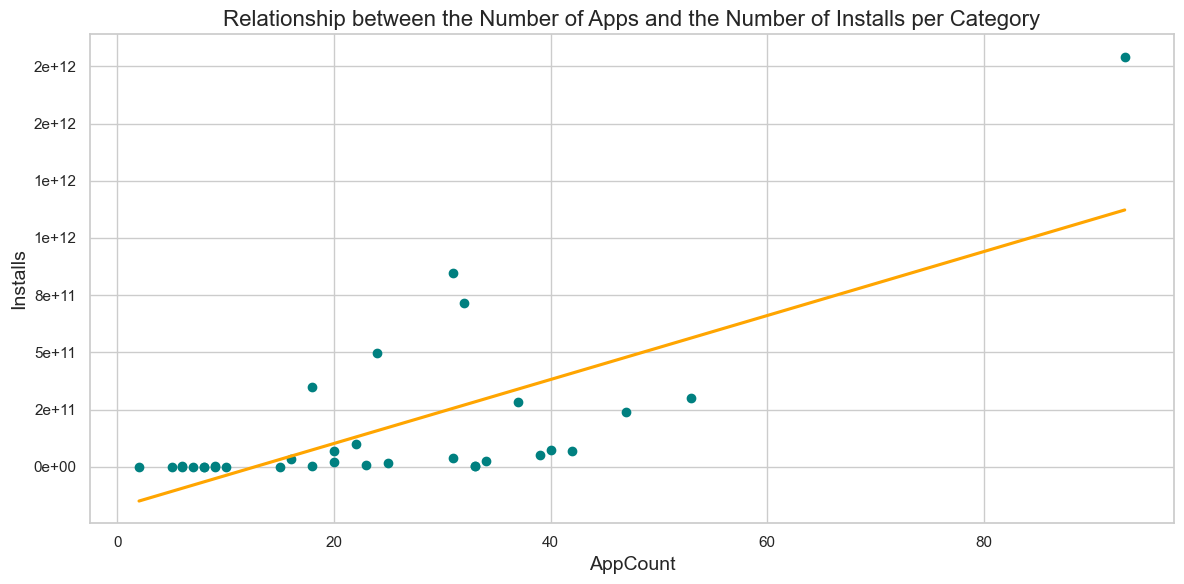

In [49]:
# Merge the two DataFrames (df_appxcat and df_instxcat) based on the common column
merged_data2 = pd.merge(df_appxcat, df_instxcat, on='Category', how='inner')

# Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(x=merged_data2['AppCount'], y=merged_data2['Installs'], color='teal')

plt.title('Relationship between the Number of Apps and the Number of Installs per Category', fontsize=16)
plt.xlabel('Number of Apps', fontsize=14)
plt.ylabel('Number of Installs (in billions)', fontsize=14)

# Add a regression line for better visualization
sns.regplot(x=merged_data2['AppCount'], y=merged_data2['Installs'], scatter=False, color='orange', ci=None)

# Format the y-axis for scientific notation
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.0e}'))

plt.tight_layout()
plt.show()


From the graph, a **positive relationship** emerges between the number of apps available in a category and the average number of installs, as highlighted by the regression line. However, it is interesting to observe that:

- **Some categories, despite having a relatively small number of apps, manage to achieve a high number of installs.** This phenomenon could indicate the presence of unsaturated markets, where user demand is significant but competition among apps is limited.

- On the other hand, categories with a larger number of apps show an increase in installs, but not always proportionally. This could suggest **market saturation** in some categories, where competition is stronger, making it harder to stand out.

In conclusion, categories with a small number of apps but a high number of installs could represent **strategic opportunities** for launching new apps, potentially offering less competition and growing demand.


In [92]:
# Stats for each category
category_stats = df.groupby('Category').agg(
    avg_rating=('Rating', 'mean'),
    total_reviews=('Reviews', 'sum'),
    total_installs=('Installs', 'sum')
).reset_index()

# Add a column with the number of apps per category
category_stats['app_count'] = df.groupby('Category')['App'].nunique().values

# Display the resulting DataFrame
category_stats.sort_values(by="total_installs", ascending=False)


,Category,avg_rating,total_reviews,total_installs,app_count
14,GAME,4.460444,103100756108,1792279600000,93
24,PHOTOGRAPHY,4.378911,10740708812,846456000000,31
6,COMMUNICATION,4.226424,4402039246,714217000000,33
21,NEWS_AND_MAGAZINES,4.177132,741532668,497925800000,24
27,SOCIAL,4.212947,23104406633,347549100000,18
11,FAMILY,4.380017,18551241181,298551640000,82
25,PRODUCTIVITY,4.395867,3615999294,283493300000,37
29,TOOLS,4.271628,2638384440,237093800000,47
8,EDUCATION,4.486954,6094479962,98265590000,22
15,HEALTH_AND_FITNESS,4.423118,2551488486,71948300000,40


In [94]:
# Stats for each category
category_stats = df.groupby('Category').agg(
    avg_rating=('Rating', 'mean'),
    total_reviews=('Reviews', 'sum'),
    total_installs=('Installs', 'sum')
).reset_index()

# Calculate the number of unique apps per category
app_count = df.groupby('Category')['App'].nunique().reset_index(name='app_count')

# Merge app_count with category_stats on the 'Category' column
category_stats = pd.merge(category_stats, app_count, on='Category')

# Calculate the median number of apps per category
app_count_median = category_stats['app_count'].median()

print(f"The median number of apps per category is: {app_count_median}")


The median number of apps per category is: 22.0


### Categories with Few Apps and High Installations

Below are the top 5 categories by installations that have fewer than 25 apps:

1. **BUSINESS**
   - **Installations:** 19,544,600,000
   - **App Count:** 20

2. **SOCIAL**
   - **Installations:** 34,754,910,000
   - **App Count:** 18

3. **EDUCATION**
   - **Installations:** 98,265,590,000
   - **App Count:** 22

4. **SHOPPING**
   - **Installations:** 66,968,000,000
   - **App Count:** 20

5. **BOOKS_AND_REFERENCE**
   - **Installations:** 35,380,100,000
   - **App Count:** 16

These categories represent an interesting case study, as they demonstrate how some categories with a relatively small number of apps manage to achieve a high number of installations. This phenomenon indicates that, contrary to the linear logic observed in the previous graph (where categories with more apps tend to also have more installations), there are markets that can be highly appealing despite low competition in terms of the number of apps.

The dataset exploration now continues with the analysis of the relationship between the Number of Apps and the Average Ratings per Category.


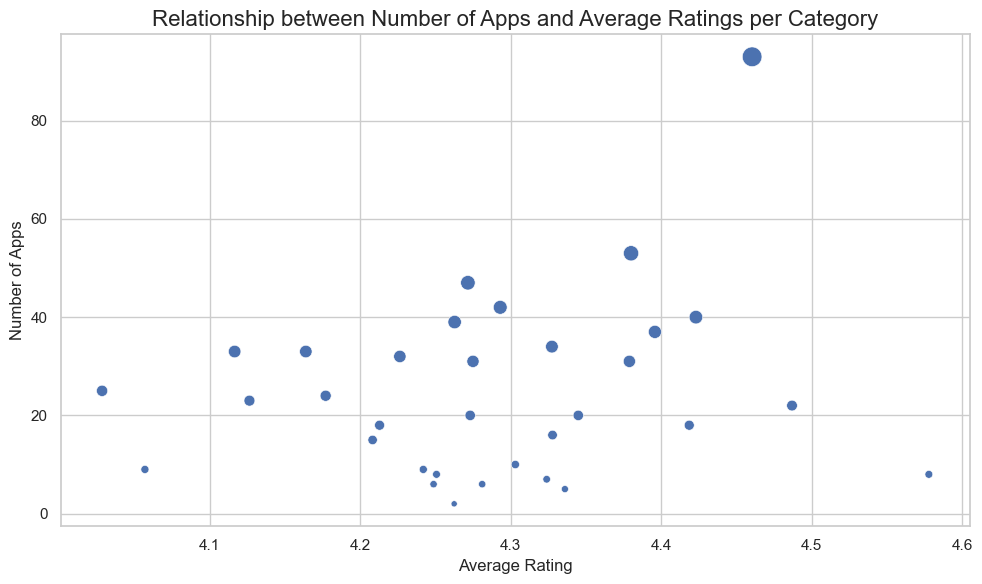

In [99]:
# Relationship between Number of Apps and Average Ratings per Category

merged = pd.merge(df_meansorted, df_appxcat, on="Category")

plt.figure(figsize=(10, 6))

scatter = sns.scatterplot(x=merged["AvgRating"], 
                          y=merged["AppCount"], 
                          size=merged["AppCount"],  # Point size based on the number of apps
                          sizes=(20, 200),         # Point sizes range between 20 and 200
                          legend=False)            # Hide the legend for simplicity

plt.title('Relationship between Number of Apps and Average Ratings per Category', fontsize=16)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Number of Apps', fontsize=12)

plt.tight_layout()

plt.show()


In [101]:
# Calculate the median number of apps and the median average rating
app_count_median = merged["AppCount"].median()
avg_rating_threshold = merged['AvgRating'].median()

# Filter categories based on the updated criteria
few_apps_high_rating = merged[(merged["AppCount"] < 25) & (merged["AvgRating"] > avg_rating_threshold)]

# Display the categories that meet these criteria
print(few_apps_high_rating[["AppCount", "AvgRating"]])


                     AppCount  AvgRating
Category                                
AUTO_AND_VEHICLES           8   4.577855
EDUCATION                  22   4.486954
FOOD_AND_DRINK             18   4.418676
SHOPPING                   20   4.344965
EVENTS                      5   4.336076
BOOKS_AND_REFERENCE        16   4.327853
MAPS_AND_NAVIGATION         7   4.323958
ART_AND_DESIGN             10   4.303141
WEATHER                     6   4.281116


Based on the relationship between the number of applications and the average rating, the following categories represent the best options for launching a new app, considering both the number of available apps and high user satisfaction:

| **Category**                 | **AppCount** | **AvgRating** |
|------------------------------|--------------|---------------|
| **AUTO_AND_VEHICLES**         | **8**        | **4.58**      |
| **EDUCATION**                 | **22**       | **4.49**      |
| **FOOD_AND_DRINK**            | **18**       | **4.42**      |
| **SHOPPING**                  | **20**       | **4.34**      |
| **EVENTS**                    | **5**        | **4.34**      |
| **BOOKS_AND_REFERENCE**       | **16**       | **4.33**      |
| **MAPS_AND_NAVIGATION**       | **7**        | **4.32**      |
| **ART_AND_DESIGN**            | **10**       | **4.30**      |
| **WEATHER**                   | **6**        | **4.28**      |

These categories offer an excellent balance between the number of apps and the average rating, with the **Education** category standing out for its high number of apps and very competitive average rating (4.49). This suggests that launching an app in one of these categories could represent a good opportunity for success, combining high user satisfaction with a market that is not overly saturated.


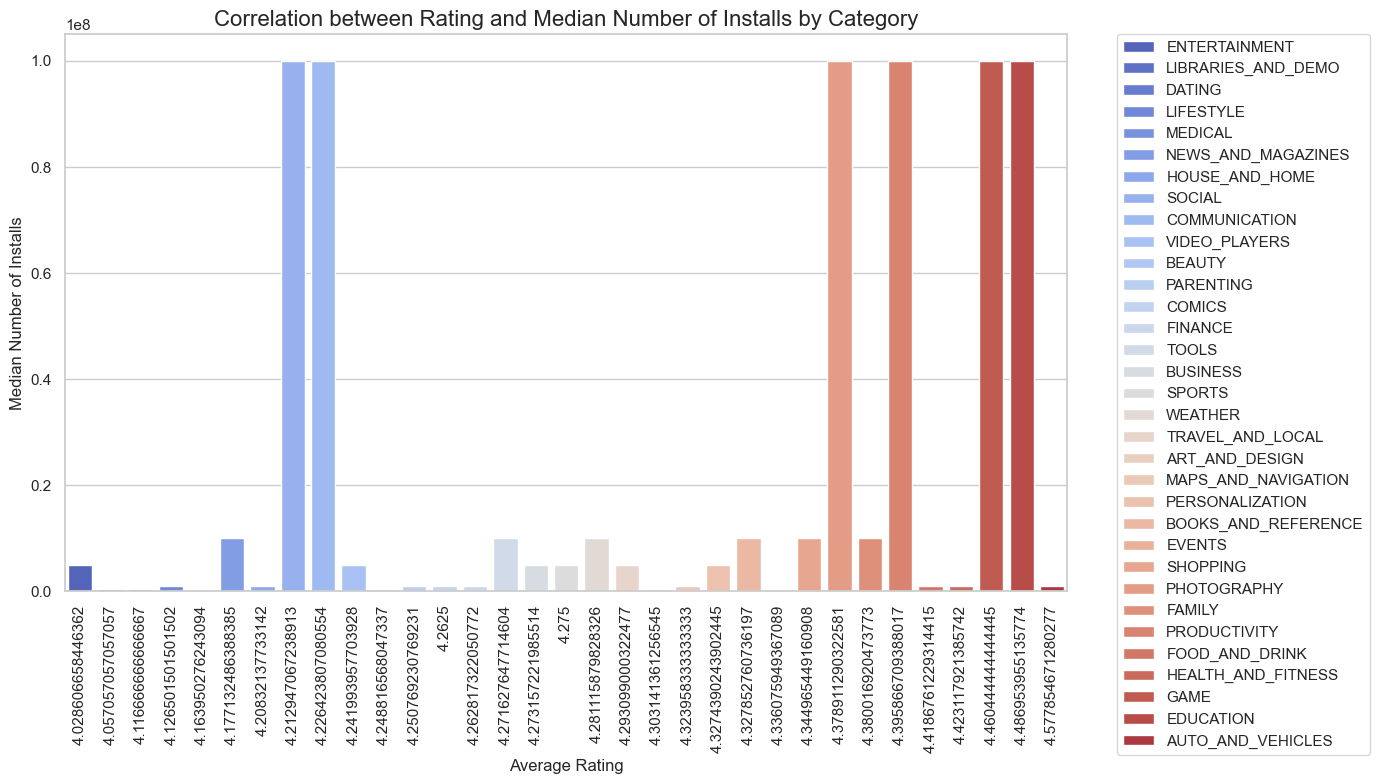

In [106]:
stats_category = df.groupby('Category').agg({
    'Rating': 'mean',       
    'Installs': 'median'    
}).reset_index()

# Sort by median of installs
stats_category = stats_category.sort_values(by='Installs', ascending=False)

# Create the plot with seaborn
plt.figure(figsize=(14, 8))
sns.barplot(x='Rating', y='Installs', hue='Category', data=stats_category, palette='coolwarm')

plt.title('Correlation between Rating and Median Number of Installs by Category', fontsize=16)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Median Number of Installs', fontsize=12)

plt.xticks(rotation=90)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.tight_layout()

plt.show()


In [108]:
# Calculate the median of installs and the mean of ratings
install_median = stats_category['Installs'].median()
rating_mean = stats_category['Rating'].mean()

# Filter categories with installs below the median and ratings above the mean
filtered_stats = stats_category[(stats_category['Installs'] < install_median) & 
(stats_category['Rating'] > rating_mean)]

# Sort by highest average rating
filtered_stats = filtered_stats.sort_values(by='Rating', ascending=False)

# Select the top 5 categories
top_5_categories = filtered_stats.head(10)

top_5_categories


,Category,Rating,Installs
1,AUTO_AND_VEHICLES,4.577855,1000000.0
15,HEALTH_AND_FITNESS,4.423118,1000000.0
13,FOOD_AND_DRINK,4.418676,1000000.0
10,EVENTS,4.336076,100000.0
19,MAPS_AND_NAVIGATION,4.323958,1000000.0
0,ART_AND_DESIGN,4.303141,500000.0


Best App Categories

The following categories represent the best based on the ratio between the number of apps and the average rating:

| Category                   | AppCount | AvgRating |
|----------------------------|----------|-----------|
| **AUTO_AND_VEHICLES**       | **8**    | **4.58**  |
| **FOOD_AND_DRINK**          | **18**   | **4.42**  |
| **SHOPPING**                | **20**   | **4.34**  |
| **EVENTS**                  | **5**    | **4.34**  |
| **BOOKS_AND_REFERENCE**     | **16**   | **4.33**  |
| **MAPS_AND_NAVIGATION**     | **7**    | **4.32**  |
| **ART_AND_DESIGN**          | **10**   | **4.30**  |
| **WEATHER**                 | **6**    | **4.28**  |

These categories offer an excellent balance between the number of apps and the quality of ratings, showing that there is a wide range of highly-rated options available for users.


## 3.3 Outlier Identification

**To identify outliers, I used the Interquartile Range (IQR) method.**

**I calculated the first quartile (Q1), the third quartile (Q3), and the IQR (Q3 - Q1).**

**Outliers are values above Q3 + 1.5 * IQR or below Q1 - 1.5 * IQR.**

Outlier analysis is particularly relevant in the context of user reviews, as it helps us identify ratings that significantly deviate from the average. In this project, we chose to include both **sentiment polarity** and **sentiment subjectivity** as key indicators of the reviews.

These two aspects provide a clearer understanding of user orientation towards the app. **Sentiment polarity** helps us understand whether the reviews are positive, negative, or neutral, while **sentiment subjectivity** provides information on how personal and subjective the opinions are.

By analyzing these indicators together, we can gain a more comprehensive view of user reactions and identify any outliers in the reviews. These outliers may indicate exceptional experiences—both positive and negative—that warrant further investigation and may offer valuable insights for improving the app and its content.


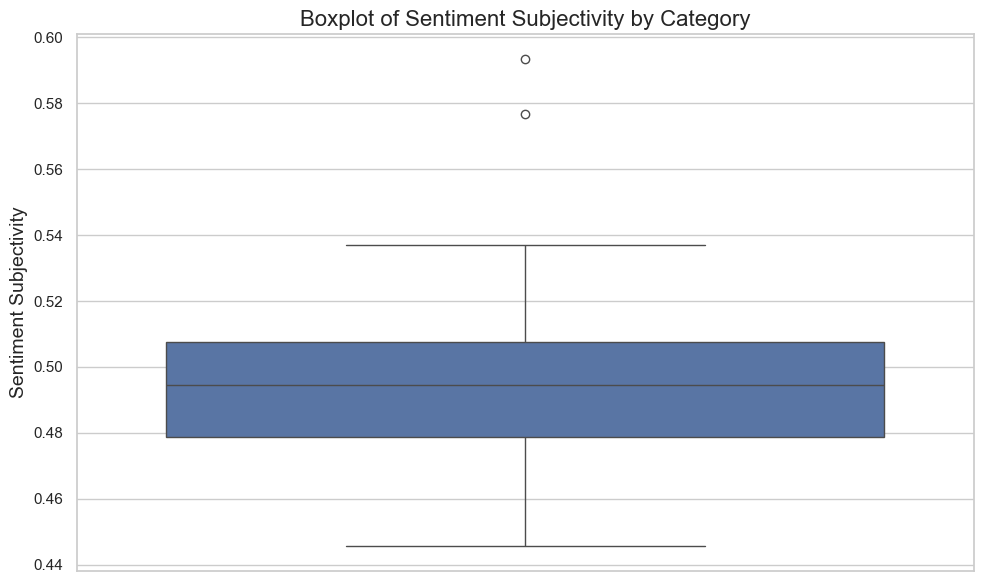

In [114]:
# Boxplot of Sentiment Subjectivity by Category

plt.figure(figsize=(10, 6))  
sns.boxplot(y=sorted_ss)  

plt.title('Boxplot of Sentiment Subjectivity by Category', fontsize=16)
plt.ylabel('Sentiment Subjectivity', fontsize=14)

plt.tight_layout()


In [116]:
# Calculation of the first and third quartiles
Q1 = sorted_ss.quantile(0.25)
Q3 = sorted_ss.quantile(0.75)
IQR = Q3 - Q1

# Limits for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Filter outliers
outliers = sorted_ss[(sorted_ss > upper_bound) | (sorted_ss < lower_bound)]

outliers


Category
COMICS    0.593556
EVENTS    0.576808
Name: Sentiment_Subjectivity, dtype: float64

### Exclusion of Categories Associated with Sentiment Subjectivity Outliers

Excluding categories associated with outliers in **Sentiment Subjectivity** can be an effective strategy to avoid distorted data, unreliable reviews, and categories with high risks, such as polarization or lack of emotional engagement.

Focusing on categories with more balanced and constructive reviews allows for launching a new app based on **more reliable feedback** and **concrete insights**. Therefore, it is recommended to focus on categories that fall within the **subjectivity range between 0.48 and 0.52**.

Avoiding outliers, as well as categories that are too subjective or too objective, enables the collection of information based on **more balanced and reliable reviews**. This approach reduces the risk of relying on extreme or polarized data that could lead to incorrect strategic decisions.


In [121]:
# Filter categories within the Sentiment_Subjectivity range
range_filtered = sorted_ss[(sorted_ss >= 0.48) & 
                            (sorted_ss <= 0.52)]

range_filtered


Category
FOOD_AND_DRINK        0.516170
DATING                0.509733
FAMILY                0.507656
HEALTH_AND_FITNESS    0.505963
PARENTING             0.503562
PHOTOGRAPHY           0.502431
SHOPPING              0.502155
GAME                  0.500638
COMMUNICATION         0.498892
SPORTS                0.497035
BEAUTY                0.494510
MEDICAL               0.492845
TRAVEL_AND_LOCAL      0.492075
WEATHER               0.490513
HOUSE_AND_HOME        0.484992
FINANCE               0.484843
EDUCATION             0.483905
VIDEO_PLAYERS         0.481774
Name: Sentiment_Subjectivity, dtype: float64

### Considerations on Sentiment Subjectivity Categories

In our analysis, we focused on five main categories: **AUTO_AND_VEHICLES**, **EDUCATION**, **GAME**, **HEALTH_AND_FITNESS**, and **FOOD_AND_DRINK**. By examining the categories with a Sentiment Subjectivity between **0.48** and **0.52**, we observe the following:

- **EDUCATION** is already present in this list with a value of **0.483905**.
- **FOOD_AND_DRINK** has a value of **0.516170**, which is close to the upper limit of our analysis.

These two categories, particularly **EDUCATION**, deserve more attention as they indicate a potential for positive sentiment from users, suggesting that these apps could benefit from further marketing strategies and improvements to enhance their market impact. Given that we have already observed a high average rating for **EDUCATION** and **HEALTH_AND_FITNESS**, it is essential to also monitor Sentiment Subjectivity in these categories to further optimize our strategies.


### Analysis of Sentiment Polarity in the Cultural App

In the context of developing an app aimed at promoting culture, the analysis of **sentiment polarity** is of fundamental importance. This metric allows us to assess user reactions to the content provided, offering a clear indication of how much the content is appreciated and considered useful for information.

#### Why Choose Sentiment Polarity

The decision to focus on sentiment polarity rather than sentiment subjectivity is driven by the need to obtain direct and measurable feedback on the appreciation of the content. While polarity indicates whether the sentiment is positive, negative, or neutral, subjectivity focuses more on the personal opinions of the users.

In the context of a cultural app, it is crucial to understand not only whether users appreciate the content but also how useful they consider it for their learning and informational process. The analysis of polarity provides immediate data on how the audience perceives the app and its content, allowing for a quick adaptation of editorial strategies.

Additionally, monitoring sentiment polarity enables the identification of trends in content appreciation, facilitating strategic decisions on which topics to expand or modify. In this way, the app not only serves as a learning tool but also becomes a dynamic environment where users can interact with culture in a meaningful and rewarding way.


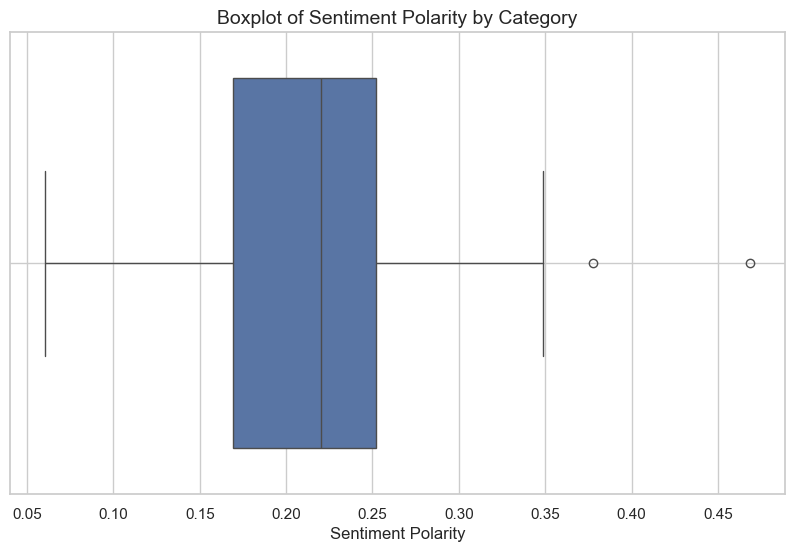

In [130]:
# Boxplot of Sentiment Polarity by Category
plt.figure(figsize=(10, 6))
sns.boxplot(x=sorted_meansp)
plt.title("Boxplot of Sentiment Polarity by Category", fontsize=14)
plt.xlabel("Sentiment Polarity", fontsize=12)
plt.grid(True)


In [132]:
# Calculation of the first and third quartiles
Q1 = sorted_meansp.quantile(0.25)
Q3 = sorted_meansp.quantile(0.75)
IQR = Q3 - Q1

# Definition of the limits for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identification of categories that are outliers
outliers = sorted_meansp[(sorted_meansp < lower_bound) | 
                         (sorted_meansp > upper_bound)]

print("Sentiment Polarity Outliers:")
print(outliers)


Sentiment Polarity Outliers:
Category
COMICS    0.468482
EVENTS    0.377933
Name: Sentiment_Polarity, dtype: float64


In [134]:
# Calculation of the first and third quartiles
Q1 = sorted_meansp.quantile(0.25)
Q3 = sorted_meansp.quantile(0.75)

# Filter categories between Q1 and Q3
categories_between_Q1_Q3 = sorted_meansp[(sorted_meansp >= Q1) & (sorted_meansp <= Q3)]

print("Categories between the 1st and 3rd quartile:")
print(categories_between_Q1_Q3)


Categories between the 1st and 3rd quartile:
Category
PERSONALIZATION        0.252074
EDUCATION              0.251392
BUSINESS               0.247749
LIBRARIES_AND_DEMO     0.240771
HOUSE_AND_HOME         0.237435
ART_AND_DESIGN         0.234735
BOOKS_AND_REFERENCE    0.226526
MEDICAL                0.222644
PHOTOGRAPHY            0.220280
TOOLS                  0.209034
BEAUTY                 0.193360
LIFESTYLE              0.187299
COMMUNICATION          0.182965
SHOPPING               0.181029
SPORTS                 0.172202
FINANCE                0.169447
PRODUCTIVITY           0.169384
Name: Sentiment_Polarity, dtype: float64


Among the categories of interest: **AUTO_AND_VEHICLES**, **EDUCATION**, **GAME**, **HEALTH_AND_FITNESS**, and **FOOD_AND_DRINK**, we can observe the following:

- **EDUCATION**: This category tends to have a good **sentiment polarity** because educational apps, such as those for learning languages or professional skills, often receive positive feedback from users. Users appreciate high-quality content that enhances their skills and knowledge.

- **HEALTH_AND_FITNESS**: This category enjoys positive polarity as more people are becoming increasingly aware of their health and well-being. Apps offering workout programs, health tracking, and nutritional advice tend to receive favorable reviews.

- **FOOD_AND_DRINK**: Food and drink-related apps can have good **sentiment polarity** because they often satisfy users' desire to discover new recipes, restaurants, and food lifestyles. Reviews tend to be positive when apps meet users' gastronomic needs.

- **AUTO_AND_VEHICLES** and **GAME**: While these categories cannot always be excluded from the list of good-reviewed categories, their experiences can vary significantly depending on the specific quality of the apps. Vehicle apps may face technical issues, while games may be subject to criticism based on gameplay style and user satisfaction.

In general, categories with good **sentiment polarity** tend to provide real value, meeting users' needs and expectations, which results in positive reviews and favorable feedback.


# 4. Conclusions

## Conclusion of the Project

Following the analysis conducted, I have identified the **Education** category as the ideal choice for launching an app that can have a positive impact on people's daily lives.

During the analysis, we considered the following key metrics to guide the selection of the best category:

- **Sentiment Polarity**:  
  This metric measures the positivity of user reviews. The **Education** category showed a significantly positive polarity, with a value of **0.251392**, indicating strong appreciation from users.

- **Sentiment Subjectivity**:  
  This indicator measures the degree of subjectivity in reviews. **Education** recorded a value of **0.483905**, balancing personal opinions with a generally positive view, suggesting a good overall perception of the apps.

- **Number of Installations and Available Apps**:  
  **Education** has 22 apps with a total of **98,265,590,000 installations**, demonstrating strong user interest despite the relatively small number of apps available, signaling an **active market**.

- **Number of Apps and Average Rating**:  
  **Education** stands out for its high number of apps and a very competitive average rating of **(4.49)**. This suggests that launching an app in this category could be a good opportunity for success, combining user satisfaction with a not overly saturated market.

These data allow us to conclude that the **Education** category is a fertile and favorable environment for launching an app capable of maximizing both social impact and commercial success.


## Why the Education Category?

- **Positive Impact**:  
  Educational apps are already recognized for their high level of user satisfaction, as shown by sentiment analysis, which identified a significant positive polarity in reviews. Users see tangible value in these apps, which not only entertain but also actively contribute to improving their daily lives.
  
- **Empowerment Tool**:  
  In particular, an app in the educational field could prove crucial for literacy and education in less developed countries. In many regions of the world, smartphones represent the first real access to educational resources, and they are a powerful tool to **democratize access to education**. The spread of educational apps could bridge the educational gap, offering learning content even to those with limited access to traditional schools.
  
- **Conscious Use of Digital Technology**:  
  Creating an educational app that promotes learning, creativity, and personal growth can play a key role in counteracting the negative aspects of excessive smartphone use, such as digital addiction. A carefully designed app could promote **a more balanced and conscious use of screen time**, transforming the device into a tool for growth rather than distraction.

- **Adaptability and Personal Growth**:  
  Educational apps offer the flexibility to learn anywhere and anytime. In an increasingly hectic world, the ability to dedicate small moments of the day to learning new skills can profoundly impact users' quality of life. Whether it's learning a new language, developing technical skills, or receiving professional training, the **Education** category can effectively meet these needs.

The goal of the project was to find a category in which to develop an app that could **enhance the user experience** and contribute positively to their well-being, without falling into the extremes and negative effects related to compulsive smartphone use.  
The **Education** category perfectly fits this mission, thanks to its ability to offer tools and content that help users improve their skills, develop new abilities, and access meaningful learning opportunities.
